### IMDB Movie Sentiment Analysis using Word2Vec

*Tutorial: https://rare-technologies.com/word2vec-tutorial/*

*API Reference: https://radimrehurek.com/gensim/models/word2vec.html*

In [1]:
import pandas as pd # to load dataset
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords # to get collection of stopwords
from nltk.tokenize import word_tokenize
import string
import gensim
import matplotlib.pyplot as plt

# layers of the architecture
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional

from tensorflow.keras.preprocessing.text import Tokenizer # to encode text to int
from keras.models import Sequential   # the model
from keras.utils import pad_sequences # to do padding or truncating

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\narsiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\narsiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
movie_reviews = pd.read_csv("IMDB_Dataset.csv")

# Check for null values
movie_reviews.isnull().values.any()

False

*Deliberately ignoring data checks and moving to data processing as this is a carry forward example from the previous session*

In [3]:
# Data Preprocessing 
def preprocess_text(sen):
    
    sen = re.sub('<.*?>', ' ', sen) # remove html tag

    tokens = word_tokenize(sen)  # tokenizing words

    tokens = [w.lower() for w in tokens]    # lower case

    table = str.maketrans('', '', string.punctuation)  # remove punctuations
    stripped = [w.translate(table) for w in tokens]

    words = [word for word in stripped if word.isalpha()]  # remove non alphabet
    stop_words = set(stopwords.words('english'))

    words = [w for w in words if not w in stop_words]   # remove stop words
    words = [w for w in words if len(w) > 2]  # Ignore words less than 2
    
    return words

In [4]:
# Store the preprocessed reviews in a new list
review_lines = []
sentences = list(movie_reviews['review'])

In [5]:
for sen in sentences:
    # Call the preprocess_text function on each sentence of the review text 
    review_lines.append(preprocess_text(sen))

len(review_lines)

10378

In [8]:
# Convert 1 is for ‘positive’ sentiment and 0 for ‘negative’.
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [7]:
EMBEDDING_DIM = 100

# Train word2vec model after preprocessing the reviews
model = gensim.models.Word2Vec(sentences=review_lines, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [9]:
words = list(model.wv.index_to_key)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 61170


##### Putting Word2Vec to test

This is Word2Vec is used to determine embeddings on your data

As a **Rule of thumb** Pretrained Word2Vec vocab and your data vocab should have **atleast 80% match** 

In [10]:
model.wv.most_similar('bad')

[('horrible', 0.9044762253761292),
 ('awful', 0.8923198580741882),
 ('terrible', 0.8860612511634827),
 ('poor', 0.8586876392364502),
 ('sucked', 0.8488072156906128),
 ('sucks', 0.8440574407577515),
 ('stupid', 0.841412365436554),
 ('dumb', 0.8171964883804321),
 ('marv', 0.8058326244354248),
 ('lame', 0.8037911653518677)]

In [11]:
#Save parameters in raw format
filename = "imdb_embedding_word2vec.txt"
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
#Extract word embeddings from a stored file
#Words that are not in 

embeddings_index = {}

f = open('imdb_embedding_word2vec.txt', encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs

f.close()

*Reference: https://medium.com/@saschametzger/what-are-tokens-vectors-and-embeddings-how-do-you-create-them-e2a3e698e037*

In [15]:
# Tokenizer class from the keras.preprocessing.text module creates a word-to-index integer dictionary
# Vectorize the text samples

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_lines)
sequences = tokenizer.texts_to_sequences(review_lines)

In [16]:
# Pad sequences
word_index = tokenizer.word_index
print('%s unique tokens' % len(word_index))

# Considering the first  100 words of each movie review
max_length = 100

#Post pad the sequence
review_pad = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
sentiment = y

print('Shape of pad tensor:', review_pad.shape)
print('Shape of sentiment tensor', sentiment.shape)
print(word_index)

61170 unique tokens
Shape of pad tensor: (10378, 100)
Shape of sentiment tensor (10378,)
{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'would': 6, 'even': 7, 'time': 8, 'story': 9, 'see': 10, 'really': 11, 'well': 12, 'much': 13, 'get': 14, 'great': 15, 'bad': 16, 'people': 17, 'could': 18, 'first': 19, 'also': 20, 'made': 21, 'way': 22, 'make': 23, 'movies': 24, 'think': 25, 'characters': 26, 'watch': 27, 'character': 28, 'films': 29, 'never': 30, 'show': 31, 'little': 32, 'many': 33, 'seen': 34, 'two': 35, 'acting': 36, 'know': 37, 'love': 38, 'best': 39, 'plot': 40, 'life': 41, 'ever': 42, 'better': 43, 'still': 44, 'say': 45, 'man': 46, 'scene': 47, 'end': 48, 'scenes': 49, 'something': 50, 'real': 51, 'back': 52, 'watching': 53, 'years': 54, 'though': 55, 'actors': 56, 'thing': 57, 'look': 58, 'funny': 59, 'actually': 60, 'work': 61, 'director': 62, 'nothing': 63, 'going': 64, 'makes': 65, 'lot': 66, 'new': 67, 'another': 68, 'every': 69, 'find': 70, 'old': 71, 'pretty':

Map embeddings from the loaded word2vec model for each word to the tokenizer.word_index vocabulary and create a matrix with of word vectors

In [17]:
# Adding 1 because of reversed 0 index
vocab_size = len(word_index) + 1

print(vocab_size)

# Create a weight matrix for words in the training data
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, index in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # If words not found in embedding matrix will be all 0's
    embedding_matrix[index, :] = embedding_vector

61171


In [38]:
EMBEDDING_DIM = 100

# Define Model
model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=EMBEDDING_DIM, 
                            trainable=False)

embedding_layer.build(input_shape=(1,))
embedding_layer.set_weights([embedding_matrix])

model.add(embedding_layer)

model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
test_split = 0.2

indices = np.arange(review_pad.shape[0])

review_pad = review_pad[indices]
sentiment = sentiment[indices]

num_test_samples = int(test_split * review_pad.shape[0])

X_train_pad = review_pad[:-num_test_samples]
y_train = sentiment[:-num_test_samples]
X_test_pad = review_pad[-num_test_samples:]
y_test = sentiment[-num_test_samples:]

In [41]:
X_train_pad.shape, y_train.shape, X_test_pad.shape, y_test.shape

((8303, 100), (8303,), (2075, 100), (2075,))

In [42]:
history = model.fit(X_train_pad, y_train, batch_size=128, verbose=1, epochs=5, validation_split=0.2)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.5069 - loss: 0.6953 - val_accuracy: 0.5491 - val_loss: 0.6813
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.5411 - loss: 0.6812 - val_accuracy: 0.6442 - val_loss: 0.6571
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.6138 - loss: 0.6476 - val_accuracy: 0.7628 - val_loss: 0.5632
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.6963 - loss: 0.5975 - val_accuracy: 0.7176 - val_loss: 0.5765
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.6985 - loss: 0.5913 - val_accuracy: 0.7640 - val_loss: 0.5268


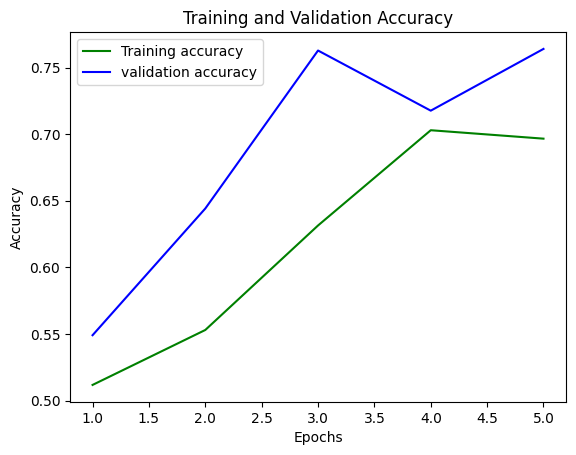

In [43]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
print('Testing...')
model.evaluate(X_test_pad, y_test)

Testing...
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7725 - loss: 0.5349


[0.5347412824630737, 0.7648192644119263]

In [46]:
# model predictions on the test data
preds = model.predict(X_test_pad)
n = np.random.randint(0, 2000)

# Predictions (set the threshold as 0.5)
if preds[n] > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

# Original Labels
if (y_test[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
predicted sentiment : positive
correct sentiment : positive


In [48]:
reviews_list_idx = tokenizer.texts_to_sequences(review_lines)

print(reviews_list_idx[1])

[243, 32, 235, 1202, 2421, 18505, 33417, 1361, 267, 10220, 371, 21342, 174, 1746, 307, 274, 56, 374, 12, 2182, 356, 3732, 75, 33418, 2055, 2873, 244, 10, 13538, 611, 9652, 1551, 1653, 8242, 6748, 12, 166, 53, 25662, 328, 1925, 274, 4218, 235, 3, 15, 933, 105, 41, 1746, 11, 141, 210, 32, 73, 942, 2460, 133, 217, 1861, 853, 3261, 1097, 966, 3813, 190, 1747, 3475, 440, 49, 3359, 21343, 25663, 532, 440, 912, 25663, 33419, 21344, 69, 2031, 1926, 12, 108]


In [49]:
# Function to get the predictions on the movie reviews using LSTM model
def add_score_predictions(data, reviews_list_idx):

  # Pad the sequences of the data
  reviews_list_idx = pad_sequences(reviews_list_idx, maxlen=max_length, padding='post', truncating='post')
  
  # Get the predictons by using LSTM model
  review_preds = model.predict(reviews_list_idx)
  
  # Add the predictions to the movie reviews data
  movie_reviews['sentiment score'] = review_preds
  
  # Set the threshold for the predictions
  pred_sentiment = np.array(list(map(lambda x : 'positive' if x > 0.5 else 'negative',review_preds)))

  # Add the sentiment predictions to the movie reviews
  movie_reviews['predicted sentiment'] = pred_sentiment

  return movie_reviews

In [50]:
# Call the above function to get the sentiment score and the predicted sentiment
data = add_score_predictions(movie_reviews, reviews_list_idx)

325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [51]:
# Display the data
data[:20]

,review,sentiment,sentiment score,predicted sentiment
0,One of the other reviewers has mentioned that ...,positive,0.180329,negative
1,A wonderful little production. <br /><br />The...,positive,0.623271,positive
2,I thought this was a wonderful way to spend ti...,positive,0.634688,positive
3,Basically there's a family where a little boy ...,negative,0.614971,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.756375,positive
5,"Probably my all-time favorite movie, a story o...",positive,0.616227,positive
6,I sure would like to see a resurrection of a u...,positive,0.512125,positive
7,"This show was an amazing, fresh & innovative i...",negative,0.590473,positive
8,Encouraged by the positive comments about this...,negative,0.176526,negative
9,If you like original gut wrenching laughter yo...,positive,0.615934,positive
